# K-means 알고리즘 이해
K-means 알고지름은 군집 중심점(centroid)이라는 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.
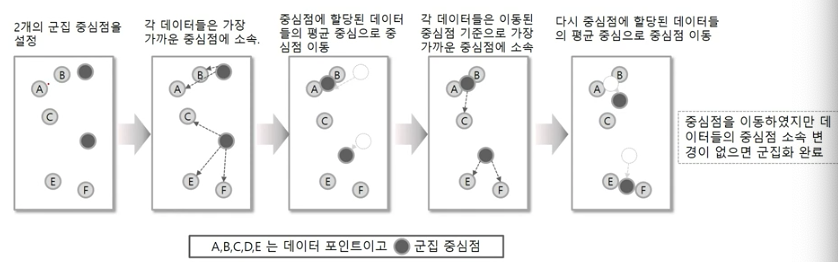

``` python
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None, 
                             copy_x=True, n_jobs=1, algorithm='auto')
```
- n_clusters: 중심점(centroid)개수를 정한다.
- init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-mean++방식으로 최초설정한다.
- max_iter: 최대반복횟수


- fit(데이터 세트), fit_transform(데이터 세트)
- model.labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- model.cluster_centers: 각 군집 중심점 좌표.(shape는 [군집개수,피처개수]) 이를 이용하면 군집중심정 좌표가 어디인지 시각화할 수 있다.
 

# K-maens를 이용한 붓꽃 데이터 군집화

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [20]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [12]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [38]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
iris_result = df.groupby(['target','cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: target, dtype: int64


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


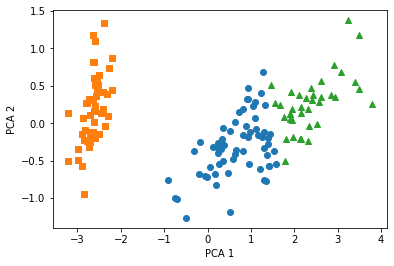

In [59]:
mark0 = df[df['cluster']==0].index
mark1 = df[df['cluster']==1].index
mark2 = df[df['cluster']==2].index

plt.scatter(x=df.loc[mark0, 'pca_x'], y=df.loc[mark0, 'pca_y'], marker='o')
plt.scatter(x=df.loc[mark1, 'pca_x'], y=df.loc[mark1, 'pca_y'], marker='s')
plt.scatter(x=df.loc[mark2, 'pca_x'], y=df.loc[mark2, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 군집화 알고리즘 테스트를 위한 데이터 생성

In [51]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [55]:
clusterdf = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y
clusterdf.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


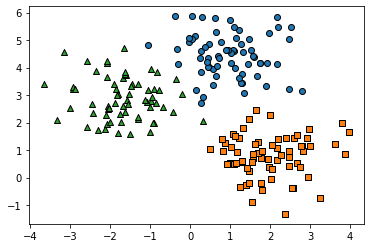

In [61]:
target_list=np.unique(y)

markers= ['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster=clusterdf[clusterdf['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',marker=markers[target])

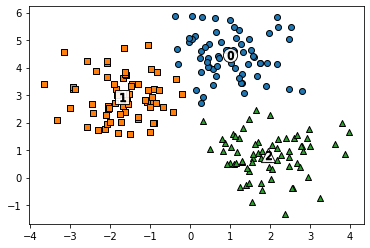

In [94]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterdf['kmeans_label'] = cluster_labels

centers=kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

for label in unique_labels:
    label_cluster = clusterdf[clusterdf['kmeans_label']==label]
    center_xy = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_xy[0], y=center_xy[1],s=200,color='white',alpha=0.9,edgecolor='k',marker=markers[label])
    plt.scatter(x=center_xy[0], y=center_xy[1],s=70,color='k',edgecolor='k',marker='$%d$' % label)
plt.show()

# 군집평가

군집화는 비지도 학습이기 때문에 정확하게 군집을 평가하는 것은 어렵다. <br>
그럼에도 불구하고 실루엣 평가를 통해서 군집을 평가할 수 있다.

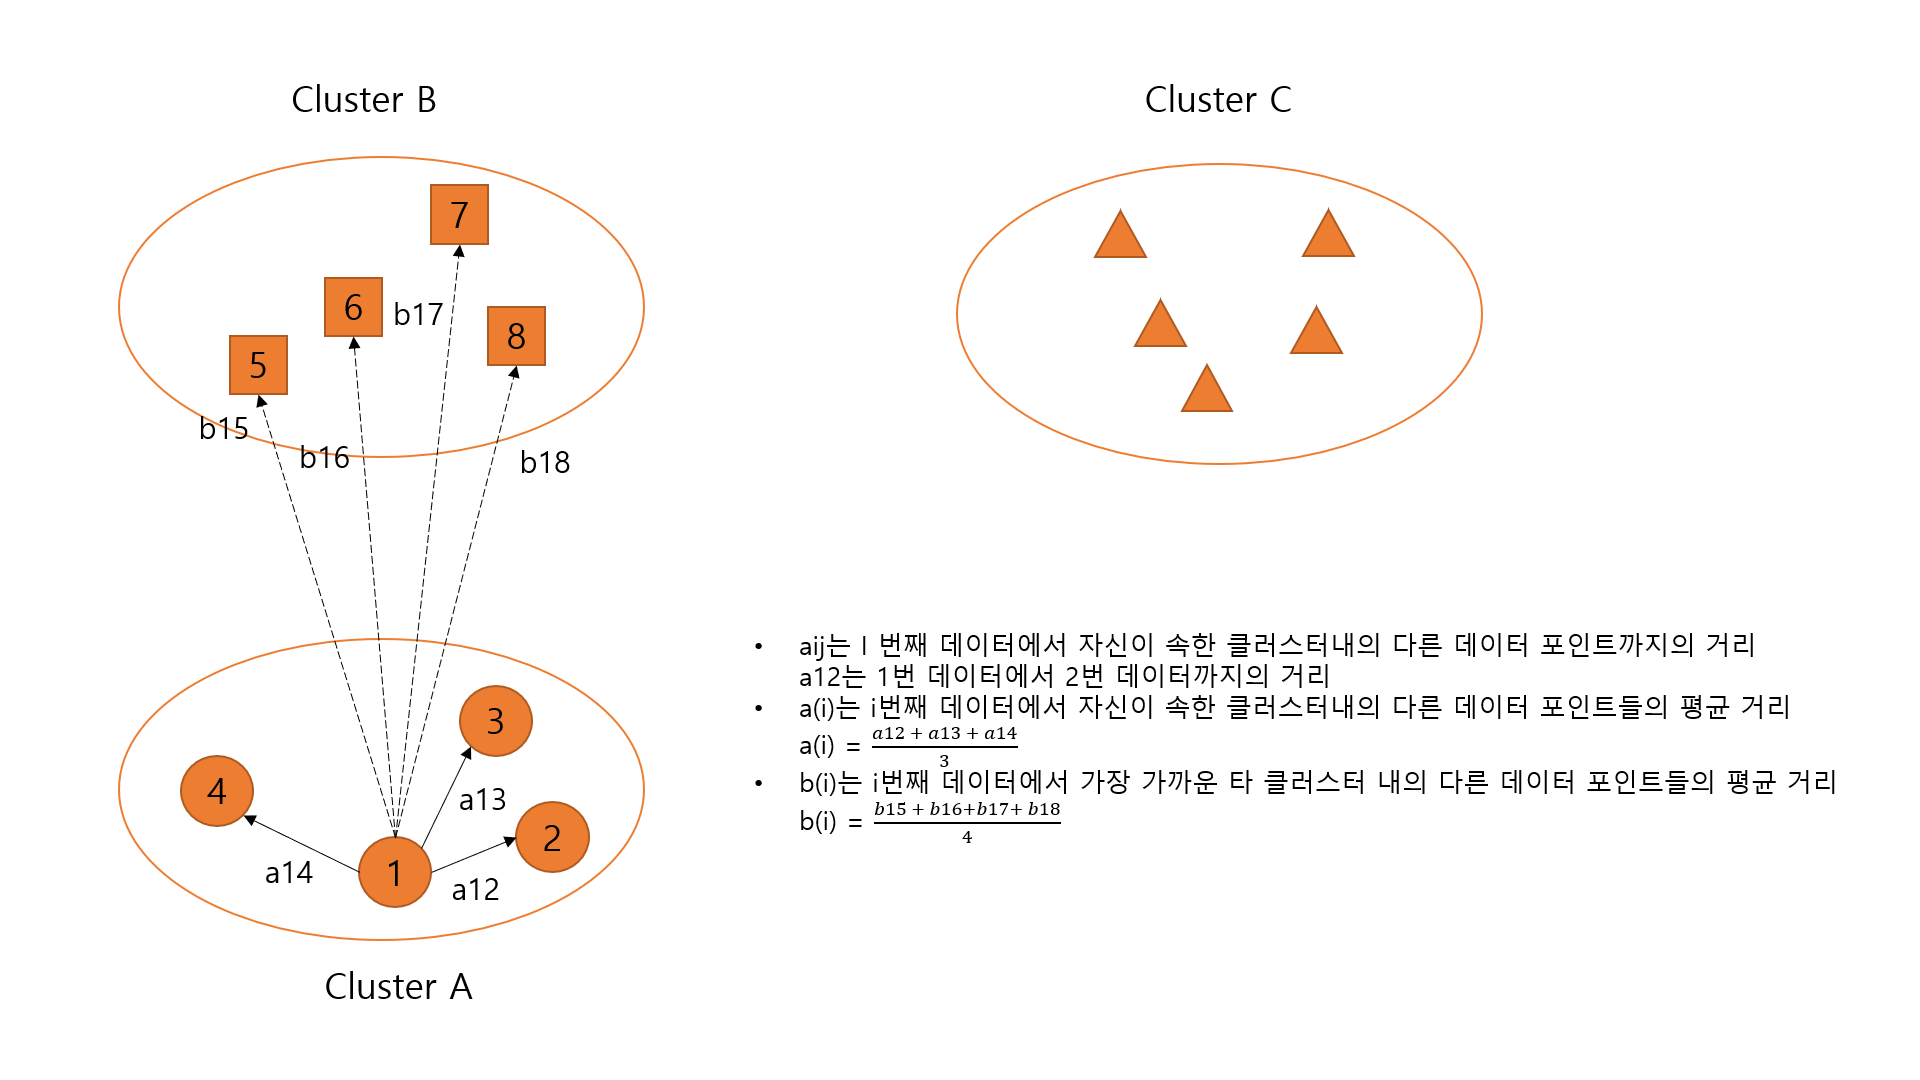
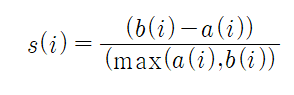

좋은 군집화가 되기위한 조건은
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score()값은 0~1사이의 값을 가지며, 1에 가까울 수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별군집의 평균값의 편차가 크지 않아야한다. 즉, 개별군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않아야 한다.

> sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds): <br>
각 데이터의 실루엣 계수를 계산해 반환한다.


> sklearn.metrics.silhouette_score(X, labels, metric='euclidean, sample_size=None, **kwds):<br>
데이터가 속한 컬럼의 평균 실루엣 계수를 계산해서 반환한다.

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, df['cluster'])
df['silhouette_coeff']=score_samples
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [103]:
df.groupby(['cluster'])['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [251]:
# 전체적인 실루엣 데이터가 중요한데(실루엣 데이터가 높더라도 편차가 크면 의미가 없기 때문이다.) 이를 위한 시각화 코드이다.


def visualize_silhouette(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

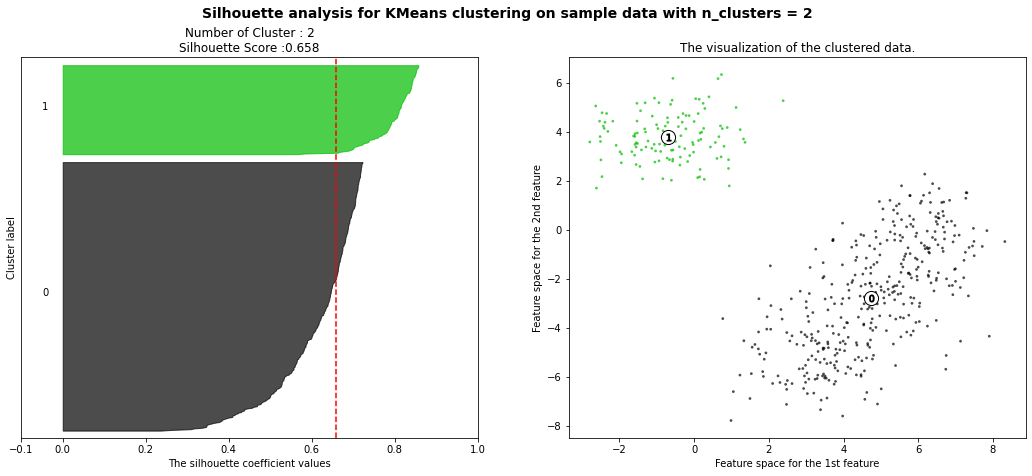

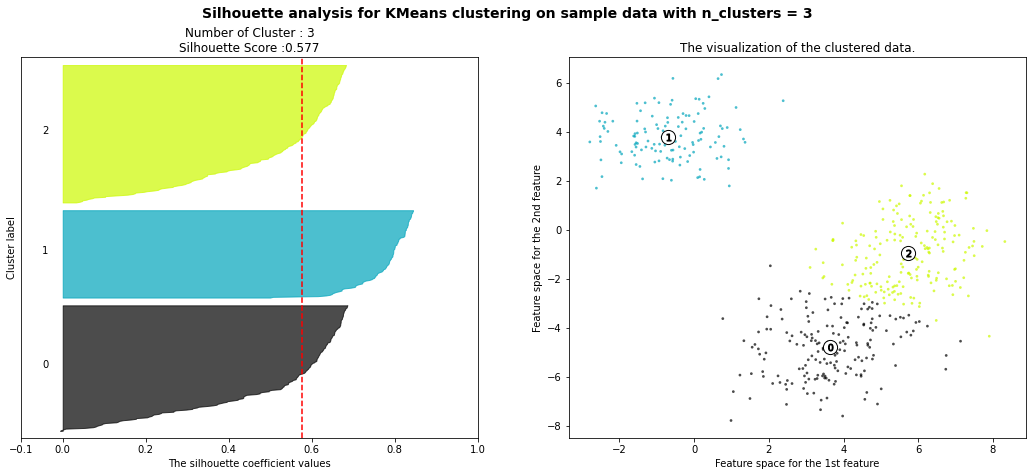

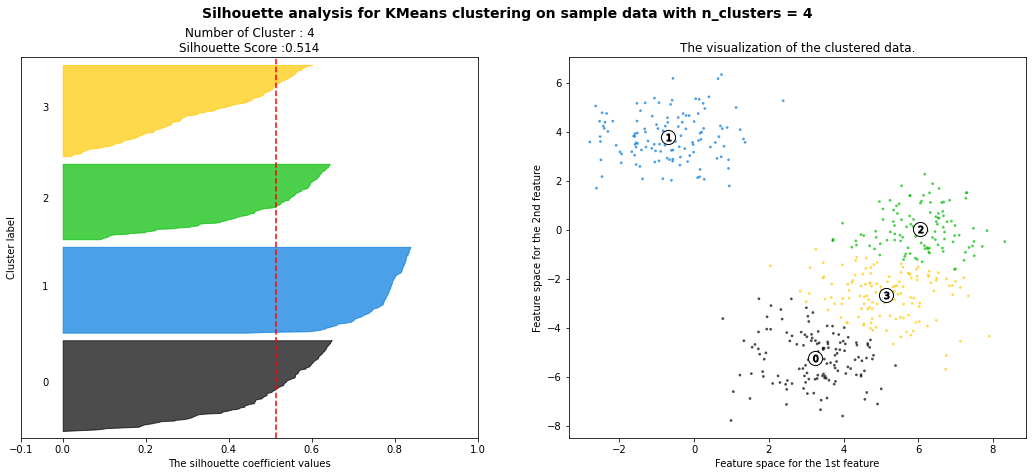

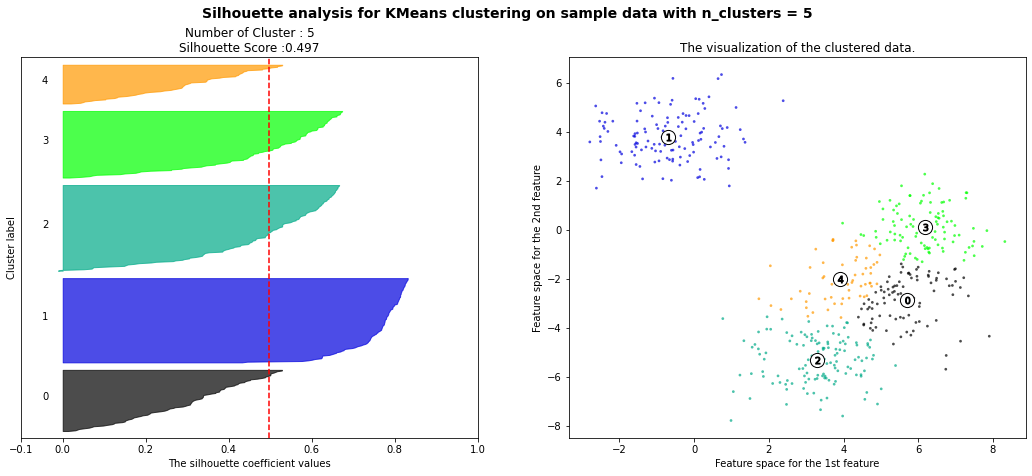

In [114]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0), shuffle=False)
visualize_silhouette_sklearn([2,3,4,5], X)

# 평균 이동(Mean Shift)

평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.<br>
평균 이동 군집화는 데이터의 분포도를 이용해서 군집 중심점을 찾는다. <br>
이를 위해서 PDF를 이용한다. PDF를 찾기 위해서는 KDE를 이용해서 찾는다. 

KDE를 이해하기 쉽게 설명해주신 블로그 글을 퍼왔다.
https://sungkee-book.tistory.com/2

sklearn에서는 MeanShift api를 제공한다. MeanShift api에서 가장 중요한 파라미터는 bandwidth인데 이는 대역폭 h와 동일하다.

bandwidth를 최적화 하기 위한 estimate_bandwidth api 또한 제공한다.

In [120]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print("대역폭 최적화 전 군집 개수: ",len(np.unique(cluster_labels)))

대역폭 최적화 전 군집 개수:  6


In [125]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
meanshift= MeanShift(bandwidth= bandwidth)

cluster_labels = meanshift.fit_predict(X)

print("대역폭 최적화 후 군집 개수: ", len(np.unique(cluster_labels)))
print("bandwidth 값", bandwidth)

대역폭 최적화 후 군집 개수:  3
bandwidth 값 1.8158484154517098


mean shift 방식은 특정 분포도 기반의 모델로  가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것이다. 또한 이상치의 영향력도 크지 않으며, 군집의 개수를 정할 필요도 없다. 하지만 알고리즘의 수행 시간이 오래 거리고 무엇보다도 대역폭 h 크기에 영향을 많이 받는다.

이와같은 이유로 평균이동 군집화 기법은 컴퓨터 비전 영역에서 더 많이 사용된다.

# GMM 군집화

GMM 군집화는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생선된 것이라는 가정하에 군집화를 수행하는 방식이다.

만약 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 새별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다. 이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수추정은 대표적으로 2가지를 추정하는 것이다.
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률

거리기반 군집화인 K-Means 군집화와 다르게 GMM은 확률기반 군집화이다.

In [126]:
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df['target']=iris.target

In [130]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

df['gmm_cluster'] = gmm_cluster_labels
df['target'] = iris.target

iris_result = df.groupby(['target'])['gmm_cluster'].value_counts()
iris_result
# K-means 를 이용한 군집화 보다 좋은 예측성능을 가진다.

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만 수행시간이 보다 오래걸린다.


# DBSCAN
DBSCAN 알고리즘을 쉽게 설명해주는 블로그 링크다.
https://bcho.tistory.com/1205

> DBSDAN(eps, min_samples)
- eps: 입실론 주변 영역의 반경
- min_samples: 핵심포인트가 되기위한 입실론 주변 영역의 반경에 속한 최소 데이터의 개수

In [131]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [142]:
df['dbscan_cluster']=dbscan_labels
df['target'] = iris.target

iris_result = df.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result
#-1은 noise를 의미한다.

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

# 군집화 실습

In [232]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
df_og = pd.read_excel(io='Online Retail.xlsx')

In [233]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [234]:
df_og

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [235]:
retail_df = df_og[df_og['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [236]:
retail_df.shape

(397884, 8)

In [237]:
# 영국이 대부분이기 때문에 영국만 조사한다.
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df.shape

(354321, 8)

In [238]:
retail_df['sale_amount'] = retail_df['UnitPrice']*retail_df['Quantity']

In [239]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [240]:
# 특수한 고객들이 굉장히 많은 양을 구매한 것을 알 수 있다.
print(retail_df['CustomerID'].value_counts().head(5), '\n')
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64 

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [241]:
# 끊어서 주문하지 않고 거의 한번에 주문했다는 것을 의미한다.
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [242]:
aggr = {
    'InvoiceDate':'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggr)

cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                          'InvoiceNo' : 'Frequency',
                          'sale_amount' : 'Monetary'})
cust_df=cust_df.reset_index()
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34
...,...,...,...,...
3915,18280,2011-03-07 09:52:00,10,180.60
3916,18281,2011-06-12 10:53:00,7,80.82
3917,18282,2011-12-02 11:43:00,12,178.05
3918,18283,2011-12-06 12:02:00,756,2094.88


In [243]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
cust_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34
...,...,...,...,...
3915,18280,278,10,180.60
3916,18281,181,7,80.82
3917,18282,8,12,178.05
3918,18283,4,756,2094.88


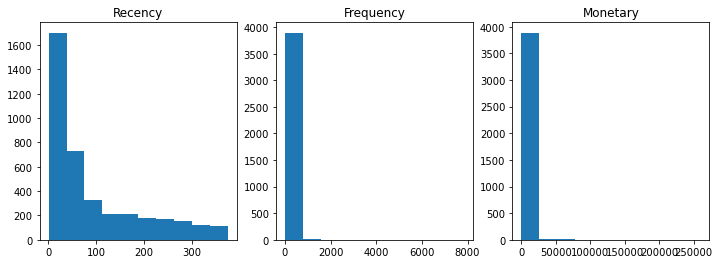

In [245]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4),nrows=1, ncols=3)
ax1.set_title('Recency')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary')
ax3.hist(cust_df['Monetary'])

plt.show()

In [247]:
cust_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.742092,90.388010,1864.385601
std,1576.594671,99.533485,217.808385,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,18.000000,17.000000,300.280000
50%,15569.500000,51.000000,41.000000,652.280000
75%,16913.250000,143.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


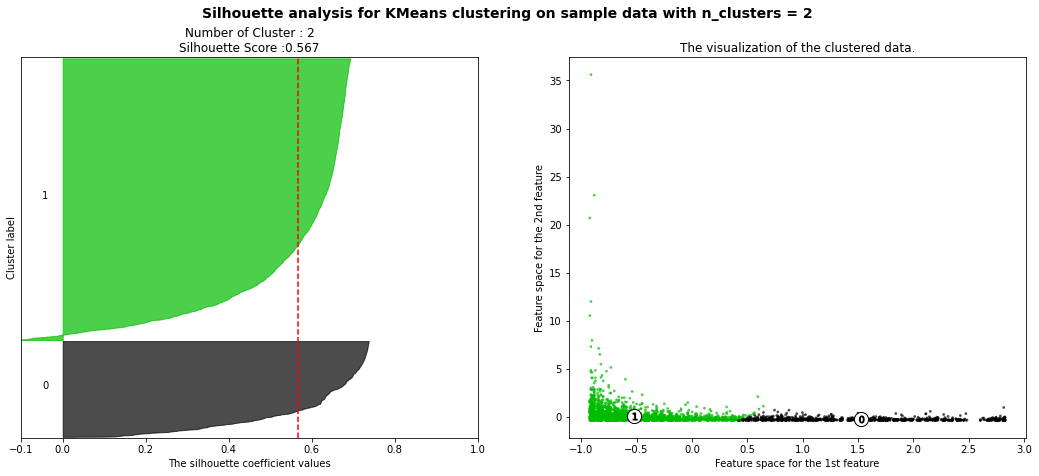

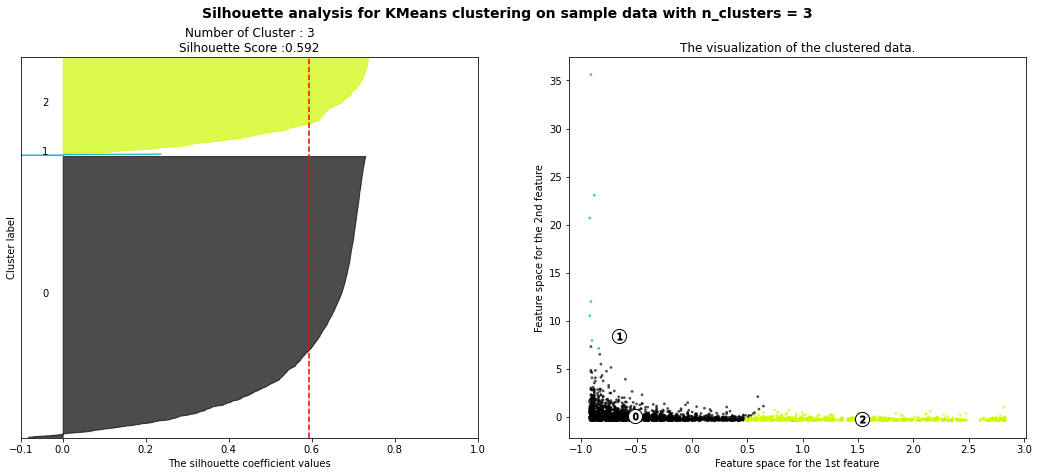

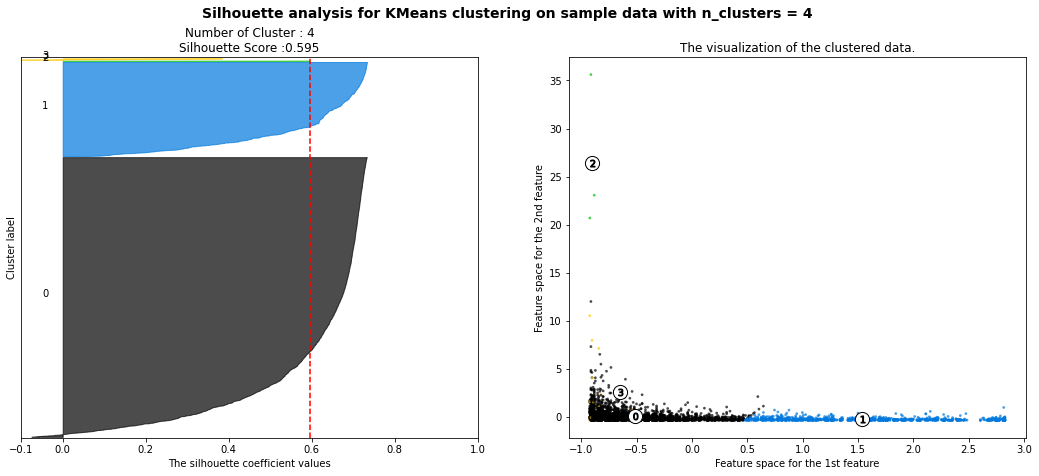

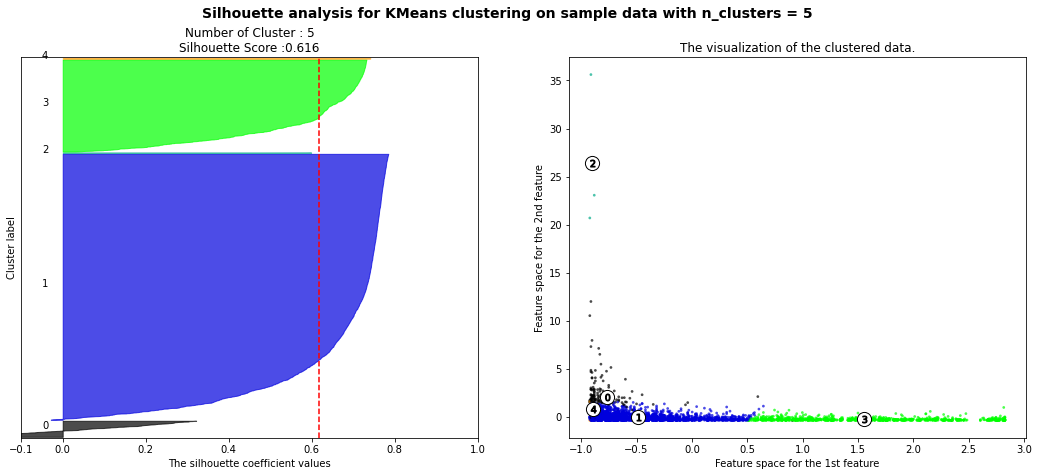

In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_feature = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_feature_scaled = StandardScaler().fit_transform(X_feature)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_feature_scaled)
cust_df['cluster label'] = labels

visualize_silhouette([2,3,4,5], X_feature_scaled)

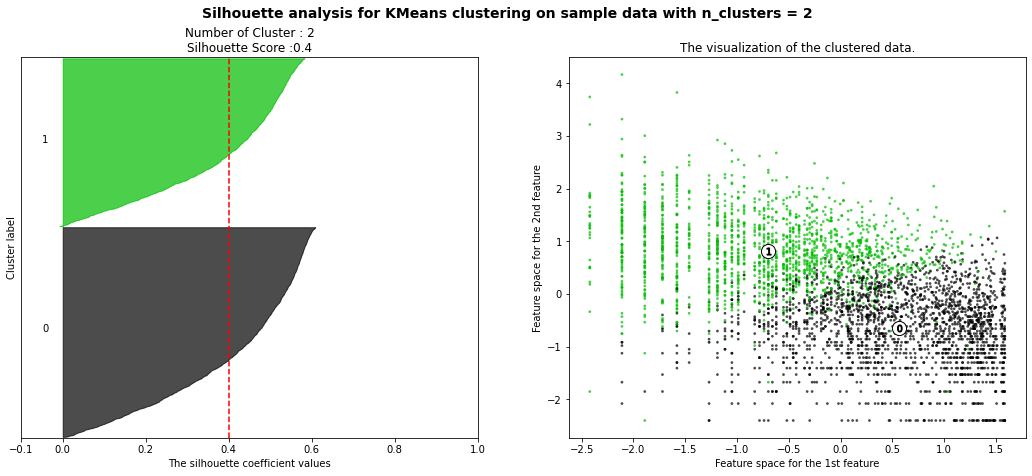

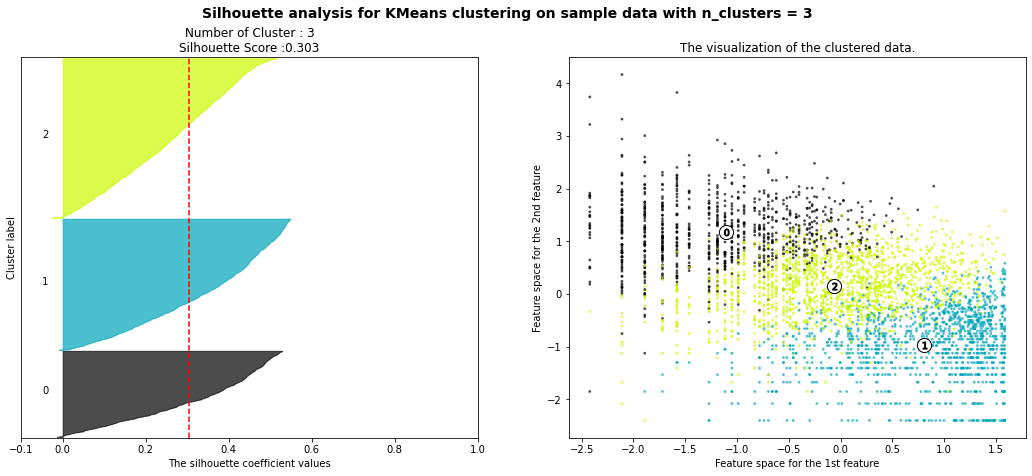

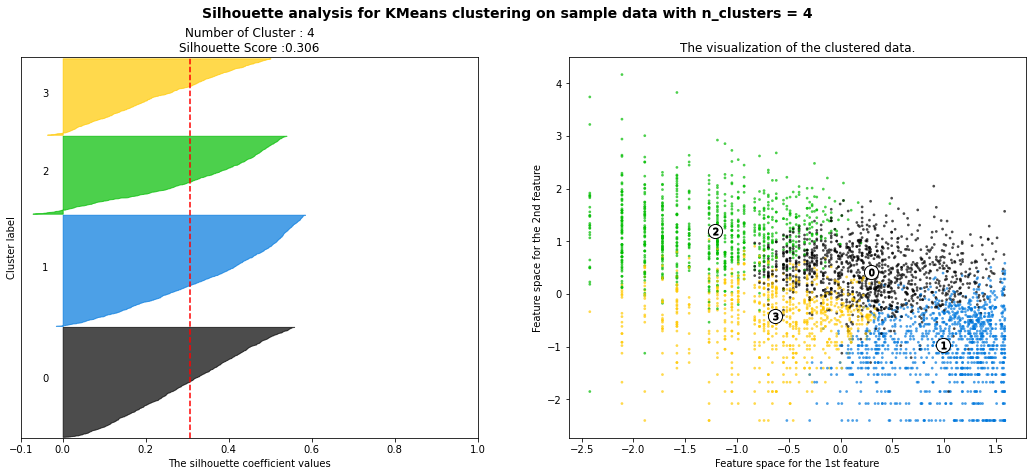

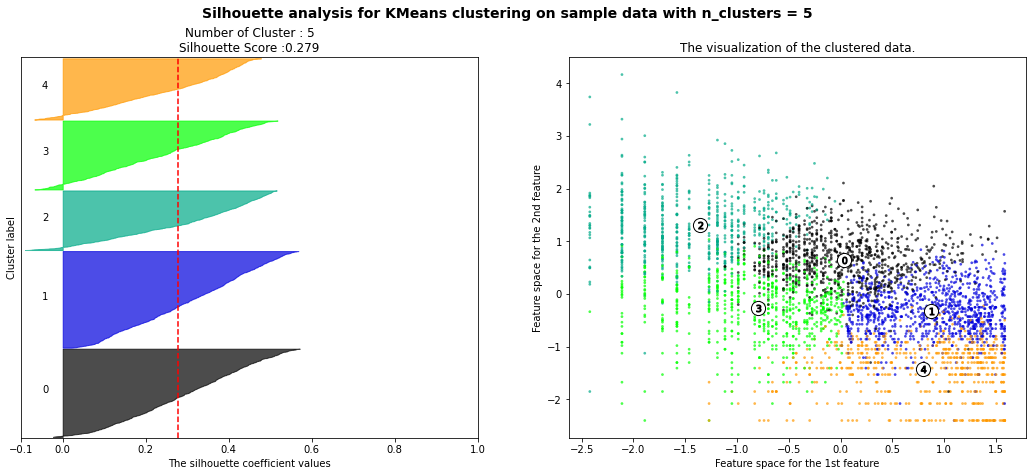

In [254]:
## 데이터가 너무 왜곡 되어 군집화가 잘 일어나지 않았다. 그러므로 log를 씌워서 군집화를 진행해보자

cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_feature = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_feature_scaled = StandardScaler().fit_transform(X_feature)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_feature_scaled)
cust_df['cluster label'] = labels

visualize_silhouette([2,3,4,5], X_feature_scaled)